In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api  as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import LabelEncoder


In [44]:
df=pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Multi Linear Regression\\50_Startups.csv')

In [45]:
df.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [54]:
labelencider = LabelEncoder()
df.iloc[:,3]=labelencider.fit_transform(df.iloc[:,3])


In [55]:
df.head(1)

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.2,136897.8,471784.1,2,192261.83


In [56]:
df.corr()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
RandD_Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [57]:
df.isnull().sum()

RandD_Spend        0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandD_Spend      50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     int32  
 4   Profit           50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


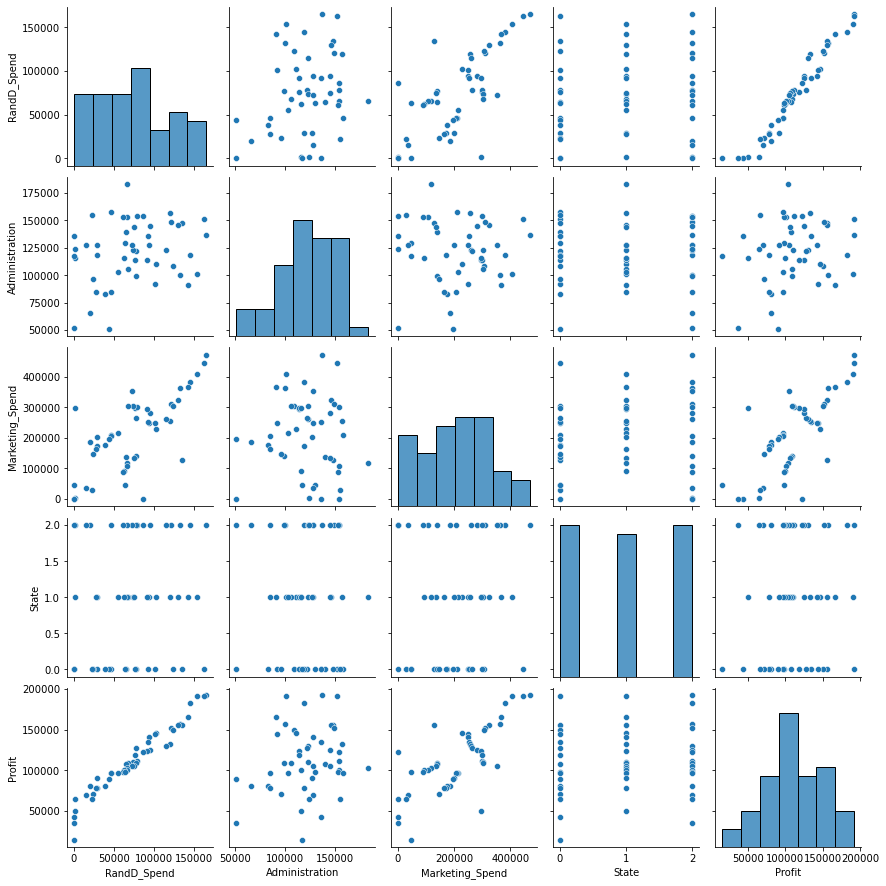

In [59]:
sns.pairplot(df)

In [60]:
model1=smf.ols('Profit ~RandD_Spend+Administration+Marketing_Spend+State',data=df).fit()

In [62]:
model1.params

Intercept          50142.506443
RandD_Spend            0.805760
Administration        -0.026826
Marketing_Spend        0.027228
State                -22.320577
dtype: float64

In [64]:
model1.tvalues

Intercept           7.368962
RandD_Spend        17.608621
Administration     -0.519906
Marketing_Spend     1.636966
State              -0.013865
dtype: float64

In [66]:
model1.pvalues

Intercept          2.900008e-09
RandD_Spend        8.249206e-22
Administration     6.056771e-01
Marketing_Spend    1.086131e-01
State              9.889988e-01
dtype: float64

In [68]:
model1.rsquared

0.9507462044842656

In [73]:
modelMarketing_Spend = smf.ols('Profit ~Marketing_Spend',data=df).fit()
modelMarketing_Spend.pvalues

Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64

In [75]:
modelState = smf.ols('Profit ~State',data=df).fit()
modelState.pvalues

Intercept    6.485443e-16
State        4.817858e-01
dtype: float64

In [77]:
modelAdministration = smf.ols('Profit ~Administration',data=df).fit()
modelAdministration.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [83]:
rsq_Marketing_Spend=smf.ols('Marketing_Spend ~RandD_Spend+Administration+State',data=df).fit().rsquared
VIF_Marketing_Spend=1/(1-rsq_Marketing_Spend)
print (rsq_Marketing_Spend)
print (VIF_Marketing_Spend)

0.570221533128404
2.326780136936846


In [86]:
rsq_Administration=smf.ols(' Administration ~RandD_Spend+Marketing_Spend+State',data=df).fit().rsquared
VIF_Administration=1/(1-rsq_Administration)
print (rsq_Administration)
print (VIF_Administration)

0.14916450053096553
1.1753153231430187


In [89]:
rsq_State=smf.ols('  State~RandD_Spend+Marketing_Spend+Administration',data=df).fit().rsquared
VIF_State=1/(1-rsq_State)
print (rsq_State)
print (VIF_State)

0.011154945194673083
1.0112807816962477


In [91]:
# As State and Administration are not that significant and pvalue is > 0.05 we will drop them for furthe analysis

In [93]:
df.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [101]:
df1=df.iloc[:,[0,2,4]]
df1.head()

,RandD_Spend,Marketing_Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [108]:
model2=smf.ols('Profit~RandD_Spend+Marketing_Spend',data = df1).fit()


In [107]:
model2.pvalues

Intercept          3.504062e-22
RandD_Spend        6.040433e-24
Marketing_Spend    6.003040e-02
dtype: float64

In [109]:
model2.rsquared

0.9504503015559763

In [110]:
# Normality Check QQ Plot

C:\Users\kkdk0001\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


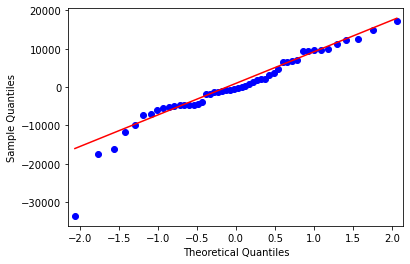

In [113]:
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,line = 'q')

In [115]:
list(np.where(model2.resid>10))

[array([ 1,  2,  3, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36, 37,
        38, 40, 41, 42, 43, 45], dtype=int64)]

In [116]:
#Residual Plot for Homoscedasticity

In [119]:
def get_standardized_values (vals):
    return(vals-vals.mean())/vals.std()

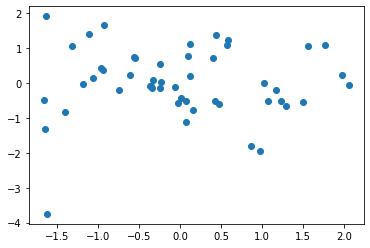

In [121]:
plt.scatter (get_standardized_values(model2.fittedvalues),get_standardized_values(model2.resid))

In [122]:
# Residual v/s Regressor Plot 

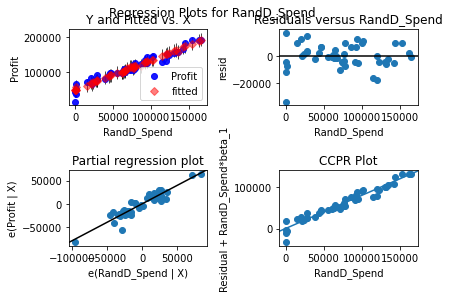

In [124]:
fig=sm.graphics.plot_regress_exog(model2,'RandD_Spend')

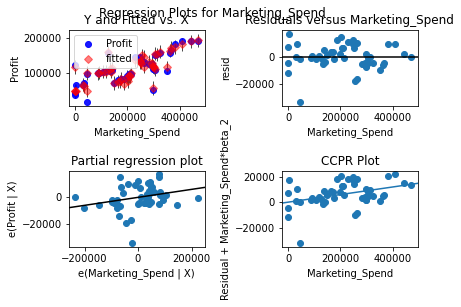

In [126]:
fig=sm.graphics.plot_regress_exog(model2,'Marketing_Spend')

In [128]:
# Cooks Distance - Model Deletion 

In [130]:
model2_influence=model2.get_influence()
(c,_)=model2_influence.cooks_distance

<StemContainer object of 3 artists>

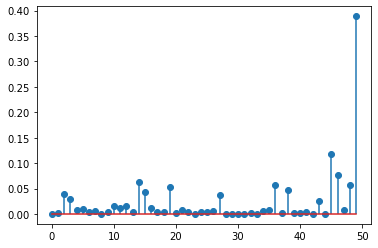

In [132]:
plt.stem(np.arange(len(df1)),np.round(c,3))

In [135]:
Final_model= smf.ols('Profit~RandD_Spend+Marketing_Spend',data=df1).fit()

In [136]:
Final_model.pvalues

Intercept          3.504062e-22
RandD_Spend        6.040433e-24
Marketing_Spend    6.003040e-02
dtype: float64

In [138]:
Final_model.rsquared

0.9504503015559763

In [142]:
df1.head(2)

,RandD_Spend,Marketing_Spend,Profit
0,165349.2,471784.10,192261.83
1,162597.7,443898.53,191792.06


In [148]:
df1["Predicted_profit"]=round(Final_model.predict(df1.iloc[:,[0,1]]))

C:\Users\kkdk0001\AppData\Local\Temp/ipykernel_13052/2695590435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Predicted_profit"]=round(Final_model.predict(df1.iloc[:,[0,1]]))


In [150]:
df1

,RandD_Spend,Marketing_Spend,Profit,Predicted_profit
0,165349.20,471784.10,192261.83,192800.0
1,162597.70,443898.53,191792.06,189775.0
2,153441.51,407934.54,191050.39,181405.0
3,144372.41,383199.62,182901.99,173441.0
4,142107.34,366168.42,166187.94,171128.0
5,131876.90,362861.36,156991.12,162879.0
6,134615.46,127716.82,156122.51,158028.0
7,130298.13,323876.68,155752.60,160456.0
8,120542.52,311613.29,152211.77,152318.0
9,123334.88,304981.62,149759.96,154344.0
